In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv').astype('float32')
print(data.head(10))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6    7.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7    3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8    5.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9    3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import numpy as np
import cv2

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
X = data.drop('label',axis = 1)
y = data['label']

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

In [6]:
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Data on train set: ", train_x.shape)
print("Data on test set: ", test_x.shape)

Data on train set:  (33600, 28, 28)
Data on test set:  (8400, 28, 28)


In [7]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New train set: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New test set: ", test_X.shape)

New train set:  (33600, 28, 28, 1)
New test set:  (8400, 28, 28, 1)


In [8]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("Number of label of train: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("Number of label of test: ", test_yOHE.shape)

Number of label of train:  (33600, 26)
Number of label of test:  (8400, 26)


In [9]:
y_int = np.int0(y)
count = np.zeros(10, dtype='int')
print(count)
for i in y_int:
   count[i] +=1

[0 0 0 0 0 0 0 0 0 0]


In [10]:
unique_values = list(set(y))

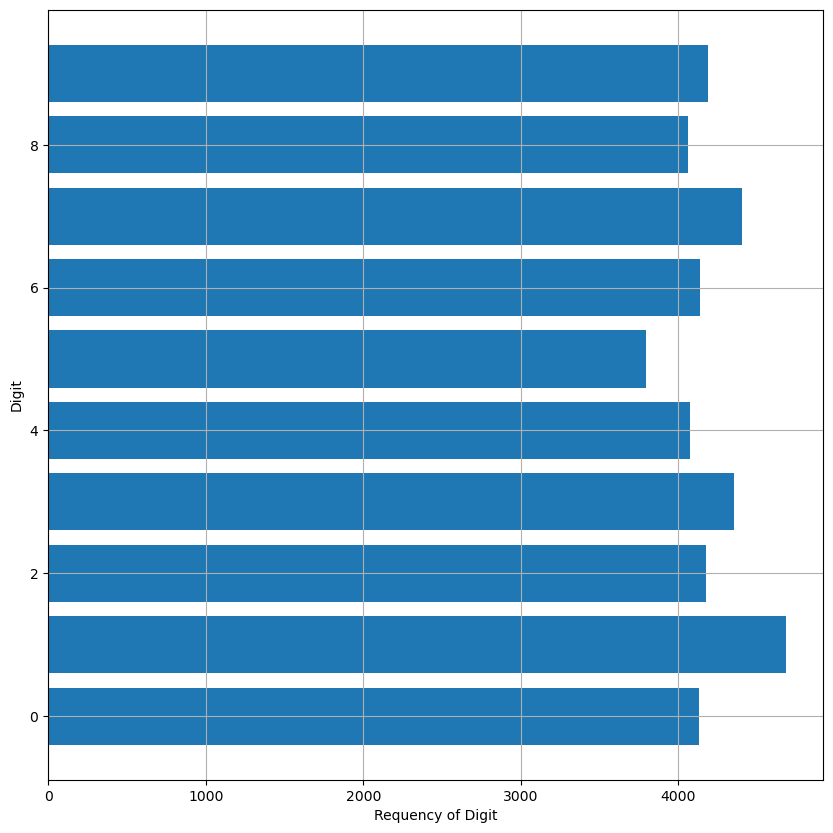

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(unique_values, count)
plt.xlabel("Requency of Digit")
plt.ylabel("Digit")
plt.grid()
plt.show()

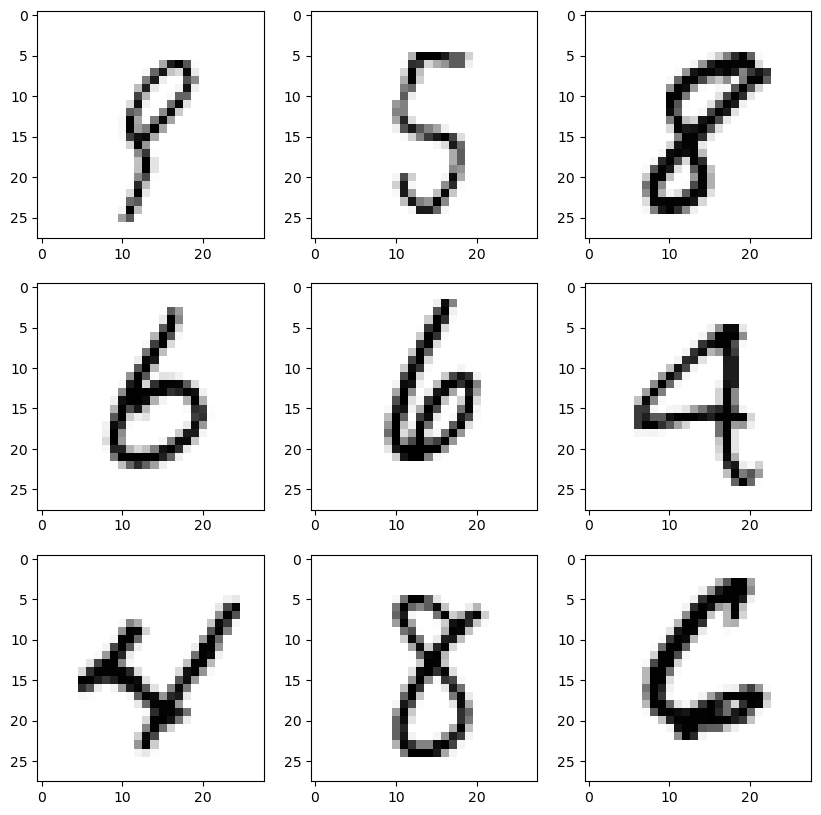

In [12]:
shuff = shuffle(train_x[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [13]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
import tensorflow
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

In [14]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [15]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

1050/1050 [==============================] - 26s 23ms/step - loss: 0.2804 - accuracy: 0.9275 - val_loss: 0.1233 - val_accuracy: 0.9625


In [16]:
print("Validation Accuracy (on test set):", history.history['val_accuracy'])
print("Accuracy on train set:", history.history['accuracy'])
print("Validation Loss (on test set):", history.history['val_loss'])
print("Loss on train set :", history.history['loss'])

Validation Accuracy (on test set): [0.9624999761581421]
Accuracy on train set: [0.9275000095367432]
Validation Loss (on test set): [0.12330005317926407]
Loss on train set : [0.28044894337654114]


In [17]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [18]:
df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv').astype('float32')
df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
test = np.reshape(df.values, (df.shape[0], 28,28))
test.shape

(28000, 28, 28)

In [20]:
test_set = test.reshape(test.shape[0],test.shape[1],test.shape[2],1)
test_set.shape

(28000, 28, 28, 1)

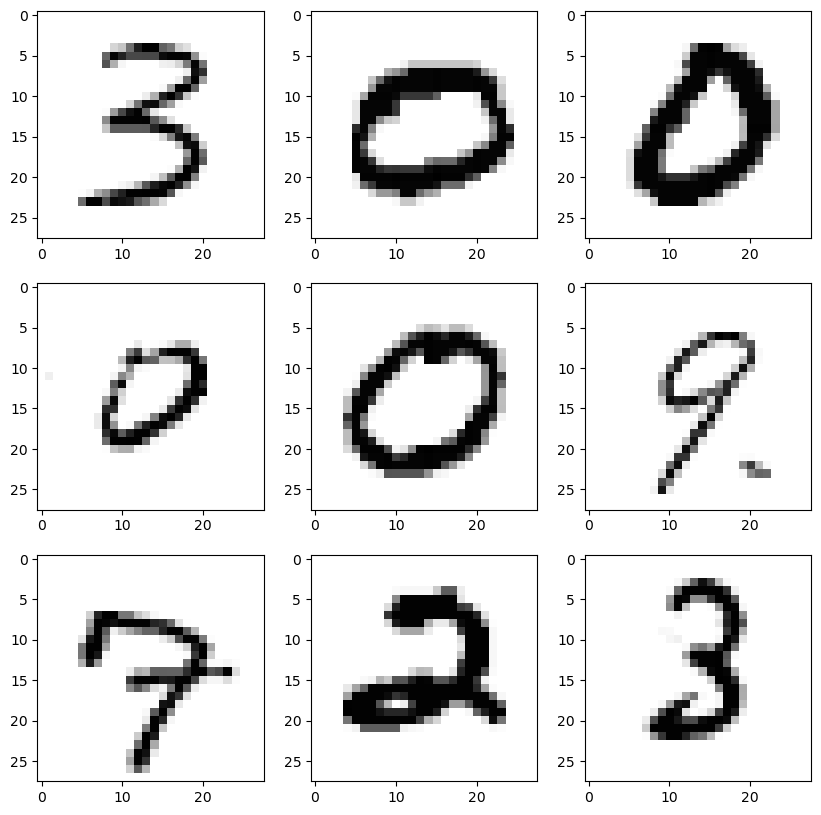

In [21]:
shuff = shuffle(test[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [22]:
predictions = model.predict(test_set)

875/875 [==============================] - 6s 6ms/step


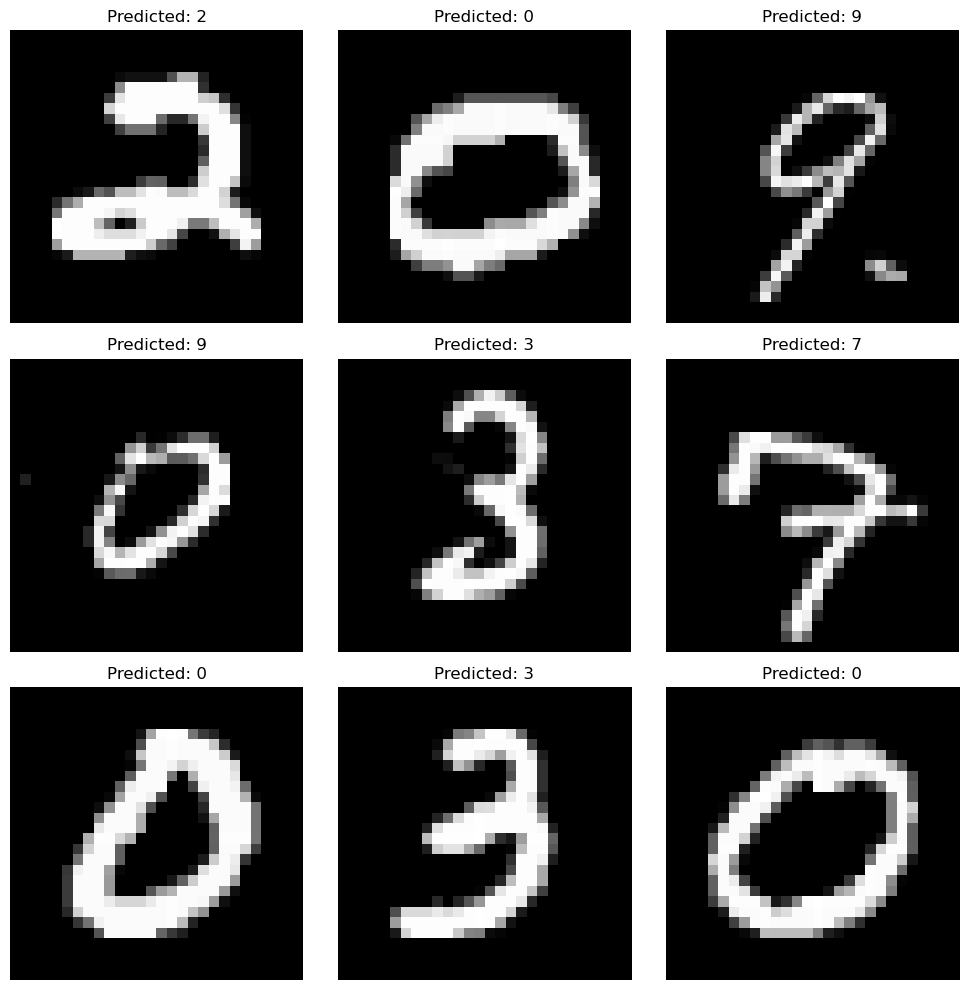

In [23]:
shuff = shuffle(test[:10])

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    # Get the predicted label with the highest probability
    predicted_label = np.argmax(predictions[i])
    
    axes[i].imshow(test_set[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Predicted: {}'.format(predicted_label))

plt.tight_layout()
plt.show()

In [24]:
result=np.argmax(predictions,axis=1)
result=pd.Series(result,name='Label')

In [25]:
submission=pd.concat([pd.Series(range(1,28001),name='ImageId'),result],axis=1)
submission.to_csv('submission.csv',index=False)